In [11]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

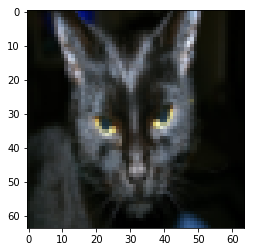

(209, 64, 64, 3)
(209, 1)
(50, 64, 64, 3)
(50, 1)


In [12]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

plt.imshow(train_x_orig[25])
plt.show()
train_x_orig = train_x_orig.astype('float32')
test_x_orig = test_x_orig.astype('float32')
train_x = train_x_orig/255
test_x = test_x_orig/255
train_y=train_y.T
test_y=test_y.T
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))      #softmax

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])    #categorical_crossentropy

In [14]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=25
epochs=10
aug = ImageDataGenerator(rotation_range=25,width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

model.fit_generator(aug.flow(train_x, train_y, batch_size=batch_size),
                    validation_data=(test_x, test_y),steps_per_epoch=len(train_x),
                    epochs=epochs, verbose=1)
model.evaluate(train_x,train_y)

Epoch 1/10
209/209 [==============================] - 228s 1s/step - loss: 0.5165 - acc: 0.7593 - val_loss: 0.5269 - val_acc: 0.8600
Epoch 2/10
209/209 [==============================] - 216s 1s/step - loss: 0.3596 - acc: 0.8422 - val_loss: 0.4466 - val_acc: 0.8800
Epoch 3/10
209/209 [==============================] - 227s 1s/step - loss: 0.2951 - acc: 0.8782 - val_loss: 0.4993 - val_acc: 0.8400
Epoch 4/10
209/209 [==============================] - 255s 1s/step - loss: 0.2409 - acc: 0.9010 - val_loss: 0.3595 - val_acc: 0.8800
Epoch 5/10
209/209 [==============================] - 365s 2s/step - loss: 0.2072 - acc: 0.9216 - val_loss: 0.4194 - val_acc: 0.8600
Epoch 6/10
209/209 [==============================] - 464s 2s/step - loss: 0.1904 - acc: 0.9395 - val_loss: 1.8723 - val_acc: 0.7200
Epoch 7/10
209/209 [==============================] - 483s 2s/step - loss: 0.1686 - acc: 0.9464 - val_loss: 1.6802 - val_acc: 0.6800
Epoch 8/10
209/209 [==============================] - 484s 2s/step - 

[0.006980296239325372, 0.9952153110047847]

In [18]:
model.evaluate(test_x,test_y)

50/50 [==============================] - 1s 23ms/step


[0.802367205619812, 0.8399999976158142]

In [21]:
Y_pred=model.predict(test_x)

In [32]:
for i in range(len(Y_pred)):
    if Y_pred[i]>0.5:
        Y_pred[i]=1
    else:
        Y_pred[i]=0
        
        

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm=confusion_matrix(test_y,Y_pred)

In [35]:
cm

array([[16,  1],
       [ 7, 26]], dtype=int64)